In [1]:
from astropy.table import Table, join, vstack
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy import constants as c
from astropy import units as u
import numpy as np
from glob import glob
from synphot import SpectralElement, units
from astropy.io import fits
import numpy as np
from glob import glob 
import aplpy
import matplotlib.pyplot as plt

plt.style.use('paper')

In [2]:
def get_hdu(rootdir, filename, hdu_id=0):
    filename_full = glob(rootdir+filename)[0]
    print(filename_full)
    if hdu_id == 'all':
        hdu = fits.open(filename_full)
    else:
        hdu = fits.open(filename_full)[hdu_id]
    return(hdu)

galaxy = 'ngc628c'
galaxy_muse = 'ngc0628'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 
run_cleanup = True

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Take the anchored version, careful of name change in variable
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb        = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse            = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')
hdu_muse_ha         = hdu_muse['HA6562_FLUX']
hdu_muse_f555w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f555w.fits')
hdu_muse_f65Xn      = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s.fits' %narrowband_filter)
hdu_muse_f814w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f814w.fits')
hdu_hst_f555w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w.fits')
hdu_hst_f65Xn       = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s.fits' %narrowband_filter)
hdu_hst_f814w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w.fits')
hdu_hst_ha          = get_hdu(rootdir, 'hst_contsub/hdu_hst_an_ha.fits')
hdu_hst_ha_noan     = get_hdu(rootdir, 'hst_contsub/hdu_hst_ha.fits')
hdu_hst_an_cont     = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an_cont.fits' %narrowband_filter)
hdu_muse_contsub    = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s_contsub.fits' %narrowband_filter)
hdu_hst_f555w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_smre.fits')
hdu_hst_f65Xn_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_smre.fits' %narrowband_filter)
hdu_hst_f814w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_smre.fits')
hdu_hst_f555w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_an.fits') 
hdu_hst_f65Xn_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an.fits' %narrowband_filter) 
hdu_hst_f65Xn_anf   = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_anf.fits' %narrowband_filter) 
hdu_hst_f814w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_an.fits') 
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_hst_ha_crop     = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_crop.fits' %galaxy)
hdu_hst_ha_s_crop   = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_s_crop.fits' %galaxy)
hdu_hst_ha_si_crop  = get_hdu(rootdir,'hst_contsub/%s_hst_ha_si_crop.fits' %galaxy)
hdu_hst_ha_sic_crop = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_sic_crop.fits' %galaxy)

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_an_ha.

In [3]:
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/' 
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

t_uvis_f555w = Table.read('%s/HST_WFC3_UVIS1.F555W.dat' %rootdir_bp, format='ascii')
t_uvis_f657n = Table.read('%s/HST_WFC3_UVIS1.F657N.dat' %rootdir_bp, format='ascii')
t_uvis_f658n = Table.read('%s/HST_WFC3_UVIS1.F658N.dat' %rootdir_bp, format='ascii')
t_uvis_f814w = Table.read('%s/HST_WFC3_UVIS1.F814W.dat' %rootdir_bp, format='ascii')

t_acs_f555w = Table.read('%s/HST_ACS_WFC.F555W.dat' %rootdir_bp, format='ascii')
t_acs_f658n = Table.read('%s/HST_ACS_WFC.F658N.dat' %rootdir_bp, format='ascii')
t_acs_f814w = Table.read('%s/HST_ACS_WFC.F814W.dat' %rootdir_bp, format='ascii')

t_sample = Table.read('%s/sample_table/phangs_sample_table_v1p6.fits' %rootdir)

In [4]:
def get_bandpassinfo(files):

    files.sort()

    bp = {}
    for file in files:

        print(file)

        area = 45238.93416 * units.AREA  # HST
        bp_ = SpectralElement.from_file(file)
        name = file.split('/')[-1].split('.dat')[0].replace('HST_', '').replace('.F', '_F')
        name = name.replace('WFC_', '')
        name = name.replace('WFC3_', '')
        name = name.replace('UVIS1', 'UVIS')

        bp[name] = {'equivwidth': bp_.equivwidth().value, 
                    'integrate': bp_.integrate().value, 
                    'rmswidth': bp_.rmswidth().value, 
                    'photbw': bp_.photbw().value, 
                    'fwhm': bp_.fwhm().value, 
                    'rectwidth': bp_.rectwidth().value, 
                    'pivot': bp_.pivot().value, 
                    'unit_response': bp_.unit_response(area).value}  
    
    return(bp)

files_bp = glob('%s*.dat' %rootdir_bp)
bp = get_bandpassinfo(files_bp)
bp.keys()

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F550M.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F814W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F657N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F814W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS2.F547M.dat


dict_keys(['ACS_F550M', 'ACS_F555W', 'ACS_F658N', 'ACS_F814W', 'UVIS_F555W', 'UVIS_F657N', 'UVIS_F658N', 'UVIS_F814W', 'UVIS2_F547M'])

In [5]:
keys = list(bp.keys())
unit_response = [bp[key]['unit_response']/1e-19 for key in keys]
pivot = [bp[key]['pivot'] for key in keys]
rectwidth = [bp[key]['rectwidth'] for key in keys]

filter = [key.split('_')[0] for key in keys]
instr = [key.split('_')[-1] for key in keys]

t1 = Table.Column(filter, 'Filter')
t2 = Table.Column(instr, 'Instrument')
t3 = Table.Column(unit_response, 'photflam', unit=1e-19/(u.erg/u.s/u.cm**2/u.AA))
t4 = Table.Column(pivot, 'photplam', unit=u.AA)
t5 = Table.Column(rectwidth, 'photbw', unit=u.AA)

t_filters = Table([t1,t2,t3,t4,t5])
t_filters.write('%s/filter_table.fits'%rootdir_bp, overwrite=True)
t_filters.write('%s/filter_table.tex'%rootdir_bp, format='latex', formats={'photflam': '%0.3f', 'photplam': '%0.1f', 'photbw': '%0.1f'}, overwrite=True)

In [6]:
galaxies = ['ic5332', 'ngc0628', 'ngc5068', 'ngc4535', 'ngc4321',
            'ngc4303', 'ngc4254', 'ngc3627', 'ngc3351', 'ngc2835',
            'ngc1672', 'ngc1566', 'ngc1512', 'ngc1433', 'ngc1385',
            'ngc1365', 'ngc1300', 'ngc1087', 'ngc7496']

t_sample = vstack([t_sample[t_sample['name'] == name] for name in galaxies])
t_sample.sort('name')

t_sample['orient_vlsr_Ha_reshift'] = (((t_sample['orient_vlsr'].quantity/c.c.to('km/s')) * 6564.614) + 6564.614) * u.AA
t_sample.sort('orient_vlsr_Ha_reshift')
# t_sample['name', 'orient_vlsr','orient_vlsr_Ha_reshift']

In [7]:
def get_contsub(hdu_halpha, hdu_cont1, hdu_cont2, 
                photplam_halpha=None, photplam_cont1=None, photplam_cont2=None):

    if photplam_halpha == None:
        photplam_halpha = hdu_halpha.header['PHOTPLAM']
        photplam_cont1 = hdu_cont1.header['PHOTPLAM']
        photplam_cont2 = hdu_cont2.header['PHOTPLAM']

    weight_cont1 = abs(photplam_cont2 - photplam_halpha) / abs(photplam_cont1 - photplam_cont2)
    weight_cont2 = abs(photplam_cont1 - photplam_halpha) / abs(photplam_cont1 - photplam_cont2)

    coef_cont1 = weight_cont1
    coef_cont2 = weight_cont2

    hdu_cont1.data = hdu_cont1.data * coef_cont1
    hdu_cont2.data = hdu_cont2.data * coef_cont2

    data_cont = hdu_cont1.data + hdu_cont2.data

    hdu_halpha_cont = hdu_halpha.copy()
    hdu_halpha_contsub = hdu_halpha.copy()

    hdu_halpha_cont.data = data_cont
    hdu_halpha_contsub.data = hdu_halpha.data - data_cont

    hdu_halpha_cont.data = np.array(hdu_halpha_cont.data, dtype=np.float32)
    hdu_halpha_contsub.data = np.array(hdu_halpha_contsub.data, dtype=np.float32)

    return(hdu_halpha_contsub, hdu_halpha_cont)

hdu_muse_contsub, hdu_muse_cont = get_contsub(hdu_muse_f65Xn.copy(), 
                                hdu_muse_f555w.copy(), 
                                hdu_muse_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])  

y_f555w = np.nanmean(hdu_muse_f555w.data)
y_f65Xn = np.nanmean(hdu_muse_f65Xn.data)
y_f814w = np.nanmean(hdu_muse_f814w.data)
y_contsub = np.nanmean(hdu_muse_contsub.data)
y_cont = np.nanmean(hdu_muse_cont.data)

x1 = bp['ACS_F555W']['pivot']
x2 = bp['ACS_F658N']['pivot']
x3 = bp['ACS_F814W']['pivot']

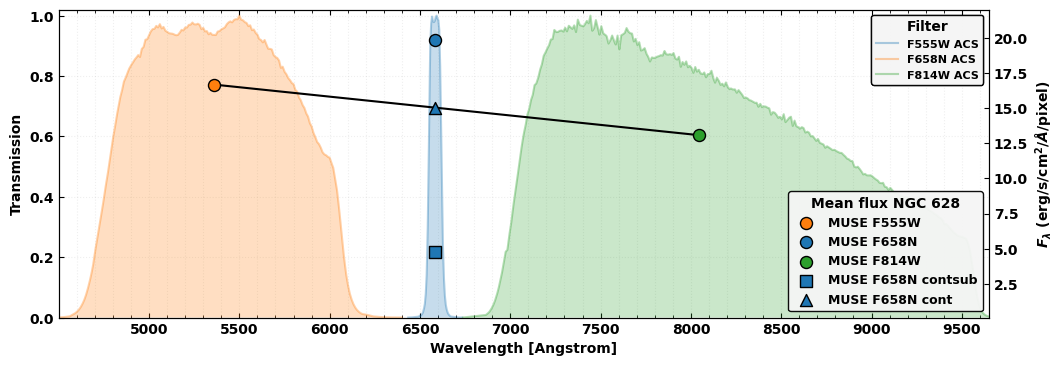

In [8]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

ax.plot(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), zorder=1, alpha=0.35)
ax.fill_between(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), alpha=0.25, zorder=1)

ax.plot(t_acs_f555w['col1'], t_acs_f555w['col2']/t_acs_f555w['col2'].max(), zorder=2, alpha=0.35)
ax.fill_between(t_acs_f555w['col1'], t_acs_f555w['col2']/t_acs_f555w['col2'].max(), alpha=0.25, zorder=2)

ax.plot(t_acs_f814w['col1'], t_acs_f814w['col2']/t_acs_f814w['col2'].max(), zorder=3, alpha=0.35)
ax.fill_between(t_acs_f814w['col1'], t_acs_f814w['col2']/t_acs_f814w['col2'].max(), alpha=0.25, zorder=3)

ax.set_xlim([4501, 9650])
ax.set_ylim([0, 1.02])

ax.set_xlabel('Wavelength [Angstrom]')
ax.set_ylabel('Transmission')

lines = ax.get_lines()
legend1 = ax.legend([lines[i] for i in [0,1,2]], ["F555W ACS", "F658N ACS", "F814W ACS"], 
                    fontsize=8, loc='upper right', title='Filter',
                    facecolor='whitesmoke', framealpha=0.95, edgecolor='k')
ax.add_artist(legend1)

ax.grid(':', alpha=0.2, which='both')

ax2 = ax.twinx()

ax2.scatter([x1], [y_f555w], c='C1', ec='black', s=75, label='MUSE F555W')
ax2.scatter([x2], [y_f65Xn], c='C0', ec='black', s=75, label='MUSE F658N')
ax2.scatter([x3], [y_f814w], c='C2', ec='black', s=75, label='MUSE F814W')

# ax2.scatter([x1,x2,x3], [y_f555w, y_f65Xn, y_f814w])
ax2.scatter([x2], [y_contsub], c='C0', ec='black', marker='s', s=75, label='MUSE F658N contsub')
ax2.scatter([x2], [y_cont], c='C0', ec='black', marker='^', s=75, label='MUSE F658N cont')

ax2.plot([x1,x3], [y_f555w, y_f814w], zorder=0, c='k')

ax2.set_ylim(0.1,22)
bbox = dict(facecolor='whitesmoke', alpha=0.95, boxstyle='round')
ax2.set_ylabel('$F_\lambda$ (erg/s/cm$^2$/$\AA$/pixel)')

ax2.legend(fontsize=9, loc='lower right', title='Mean flux NGC 628',
            facecolor='whitesmoke', framealpha=0.95, edgecolor='k')

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.xaxis.set_major_locator(MultipleLocator(500))

fig.savefig('./filters_contsub.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [9]:
galaxy = 'ngc628c'

rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
infile = '%s/muse/NGC0628-0.92asec_specpos1.fits' %rootdir

hdu = fits.open(infile)[0]
spec_av = hdu.data
spec_ax = hdu.header['CRVAL1']+(np.arange(hdu.header['NAXIS1'])*hdu.header['CDELT1'])

In [10]:
# Load spectrum and fluxes

galaxy = 'ngc628c'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy

# Taken from MUSE Cube on scigarn1
pixel = [[990, 453], #headlight
        [706, 756], #centre
        [489, 759], #normal 
        [315, 384], #bright
        [292, 585], #bright
        [497, 651],] #bright

spec_dict = {}

for i in range(5):
        print(i)

        infile = '%s/muse/NGC0628-0.92asec_specpos%i.fits' %(rootdir, (i+1))

        hdu = fits.open(infile)[0]
        spec_av = hdu.data
        spec_ax = hdu.header['CRVAL1']+(np.arange(hdu.header['NAXIS1'])*hdu.header['CDELT1'])

        pixel_ = pixel[i]

        y_f555w = hdu_muse_f555w.data[(pixel_[0], pixel_[1])]
        y_f65Xn = hdu_muse_f65Xn.data[(pixel_[0], pixel_[1])]
        y_f814w = hdu_muse_f814w.data[(pixel_[0], pixel_[1])]
        y_contsub = hdu_muse_contsub.data[(pixel_[0], pixel_[1])]
        y_cont = hdu_muse_cont.data[(pixel_[0], pixel_[1])]

        x1 = bp['ACS_F555W']['pivot']
        x2 = bp['ACS_F658N']['pivot']
        x3 = bp['ACS_F814W']['pivot']

        spec_dict['specpos%i' %(i+1)] = {'pixel':pixel_, 'spec_av':spec_av, 'spec_ax':spec_ax,
                                  'y_f555w':y_f555w, 'y_f65Xn':y_f65Xn, 'y_f814w':y_f814w,
                                  'y_contsub':y_contsub, 'y_cont':y_cont,
                                  'x1':x1, 'x2':x2, 'x3':x3}


0
1
2
3
4


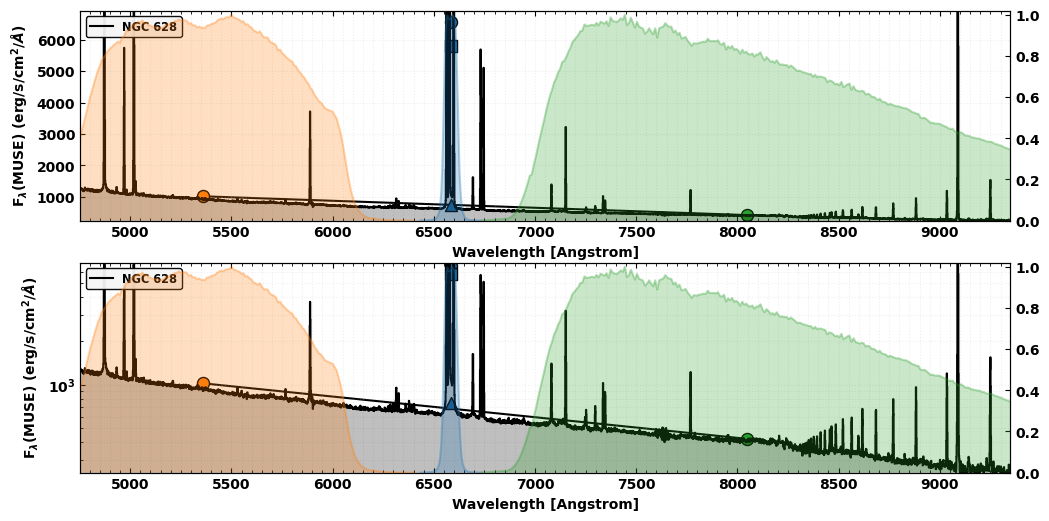

In [11]:
for i in [1]:

    spec_av = spec_dict['specpos%i' %i]['spec_av']
    spec_ax = spec_dict['specpos%i' %i]['spec_ax']

    y_f555w = spec_dict['specpos%i' %i]['y_f555w']
    y_f65Xn = spec_dict['specpos%i' %i]['y_f65Xn']
    y_f814w = spec_dict['specpos%i' %i]['y_f814w']
    y_contsub = spec_dict['specpos%i' %i]['y_contsub']
    y_cont = spec_dict['specpos%i' %i]['y_cont']

    x1 = spec_dict['specpos%i' %i]['x1']
    x2 = spec_dict['specpos%i' %i]['x2']
    x3 = spec_dict['specpos%i' %i]['x3']

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    for ax in [ax1, ax2]:

        ax.plot(spec_ax, spec_av, ds='steps-mid',c='k', label="NGC 628")
        ax.fill_between(spec_ax, spec_av, alpha=0.25, fc='k', step="mid", zorder=3)
        ax.set_xlim([np.nanmin(spec_ax[~np.isnan(spec_av)]), np.nanmax(spec_ax[~np.isnan(spec_av)])])
        ylims = np.nanpercentile(spec_av, [1,99.5])
        ax.set_ylim(ylims)

        ax.set_xlabel('Wavelength [Angstrom]')
        ax.set_ylabel('F$_\lambda$(MUSE) (erg/s/cm$^2$/$\AA$)')

        ax.grid(':', alpha=0.2, which='both')
        ax.legend(loc='upper left', fontsize=8.2, facecolor='whitesmoke', framealpha=0.95, edgecolor='k')

        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.xaxis.set_major_locator(MultipleLocator(500))

        ax3 = ax.twinx()
        ax3.plot(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), zorder=1, alpha=0.35)
        ax3.fill_between(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), alpha=0.25, zorder=1)
        ax3.plot(t_acs_f555w['col1'], t_acs_f555w['col2']/t_acs_f555w['col2'].max(), zorder=2, alpha=0.35)
        ax3.fill_between(t_acs_f555w['col1'], t_acs_f555w['col2']/t_acs_f555w['col2'].max(), alpha=0.25, zorder=2)
        ax3.plot(t_acs_f814w['col1'], t_acs_f814w['col2']/t_acs_f814w['col2'].max(), zorder=3, alpha=0.35)
        ax3.fill_between(t_acs_f814w['col1'], t_acs_f814w['col2']/t_acs_f814w['col2'].max(), alpha=0.25, zorder=3)
        ax3.set_ylim([0, 1.02])

        ax.scatter([x1], [y_f555w], c='C1', ec='black', s=75, label='MUSE F555W')
        ax.scatter([x2], [y_f65Xn], c='C0', ec='black', s=75, label='MUSE F658N')
        ax.scatter([x3], [y_f814w], c='C2', ec='black', s=75, label='MUSE F814W')
        ax.scatter([x2], [y_contsub], c='C0', ec='black', marker='s', s=75, label='MUSE F658N contsub')
        ax.scatter([x2], [y_cont], c='C0', ec='black', marker='^', s=75, label='MUSE F658N cont')
        ax.plot([x1,x3], [y_f555w, y_f814w], zorder=0, c='k')

    ax.set_yscale('log')

    fig.savefig('./figs/ngc628c_muse_specpos%i.pdf' %i, dpi=300, bbox_inches='tight', transparent=True)

Text(0, 0.5, 'F$_\\lambda$(MUSE) (erg/s/cm$^2$/$\\AA$)')

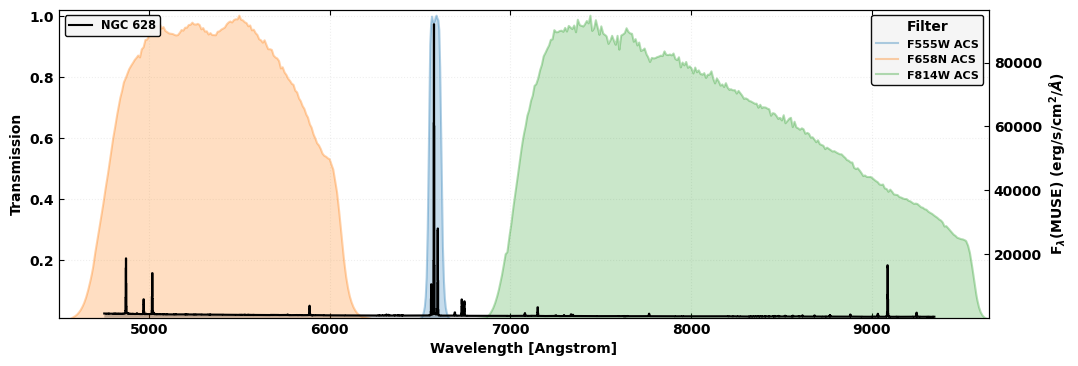

In [12]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax1 = ax.twinx()

ax.plot(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), zorder=1, alpha=0.35)
ax.fill_between(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), alpha=0.25, zorder=1)

ax.plot(t_acs_f555w['col1'], t_acs_f555w['col2']/t_acs_f555w['col2'].max(), zorder=2, alpha=0.35)
ax.fill_between(t_acs_f555w['col1'], t_acs_f555w['col2']/t_acs_f555w['col2'].max(), alpha=0.25, zorder=2)

ax.plot(t_acs_f814w['col1'], t_acs_f814w['col2']/t_acs_f814w['col2'].max(), zorder=3, alpha=0.35)
ax.fill_between(t_acs_f814w['col1'], t_acs_f814w['col2']/t_acs_f814w['col2'].max(), alpha=0.25, zorder=3)

ax.plot([-1, -1], [-1,-1], ds='steps-mid',c='k', label="NGC 628")
ax1.plot(spec_ax, spec_av, ds='steps-mid',c='k', label="NGC 628")
ax1.fill_between(spec_ax, spec_av, alpha=0.25, fc='k', step="mid", zorder=3)

ax.set_xlim([4501, 9650])
ax.set_ylim([0.01, 1.02])
ax1.set_ylim([0.01, np.nanmax(spec_av)*1.05])

ax.set_xlabel('Wavelength [Angstrom]')
ax.set_ylabel('Transmission')

ax.grid(':', alpha=0.2, which='both')

lines = ax.get_lines()
legend1 = ax.legend([lines[i] for i in [0,1,2]], ["F555W ACS", "F658N ACS", "F814W ACS"], 
                    fontsize=8, loc='upper right', title='Filter',
                    facecolor='whitesmoke', framealpha=0.95, edgecolor='k')
ax.add_artist(legend1)

ax.legend(loc='upper left', fontsize=8.2, facecolor='whitesmoke', framealpha=0.95, edgecolor='k')

ax1.set_ylabel('F$_\lambda$(MUSE) (erg/s/cm$^2$/$\AA$)')

# ax.xaxis.set_minor_locator(MultipleLocator(5))
# ax.xaxis.set_major_locator(MultipleLocator(20))

# fig.savefig('./figs/ngc628c_filters.pdf', dpi=300, bbox_inches='tight', transparent=True)